In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [6]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(28, 28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history=model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


750/750 [==============================] - 97s 105ms/step - loss: 0.5791 - accuracy: 0.7855 - val_loss: 0.3847 - val_accuracy: 0.8593
Epoch 2/10
750/750 [==============================] - 82s 110ms/step - loss: 0.3597 - accuracy: 0.8699 - val_loss: 0.3319 - val_accuracy: 0.8832
Epoch 3/10
750/750 [==============================] - 68s 91ms/step - loss: 0.3065 - accuracy: 0.8879 - val_loss: 0.2953 - val_accuracy: 0.8932
Epoch 4/10
750/750 [==============================] - 58s 77ms/step - loss: 0.2767 - accuracy: 0.8975 - val_loss: 0.2821 - val_accuracy: 0.8950
Epoch 5/10
750/750 [==============================] - 93s 124ms/step - loss: 0.2497 - accuracy: 0.9089 - val_loss: 0.2771 - val_accuracy: 0.8980
Epoch 6/10
750/750 [==============================] - 100s 133ms/step - loss: 0.2321 - accuracy: 0.9137 - val_loss: 0.2630 - val_accuracy: 0.9038
Epoch 7/10
750/750 [==============================] - 101s 135ms/step - loss: 0.2099 - accuracy: 0.9229 - val_loss: 0.2687 - val_

In [11]:
import matplotlib.pyplot as plt

In [12]:
test_loss, test_accuracy=model.evaluate(test_images, test_labels)

313/313 [==============================] - 10s 32ms/step - loss: 0.2569 - accuracy: 0.9093


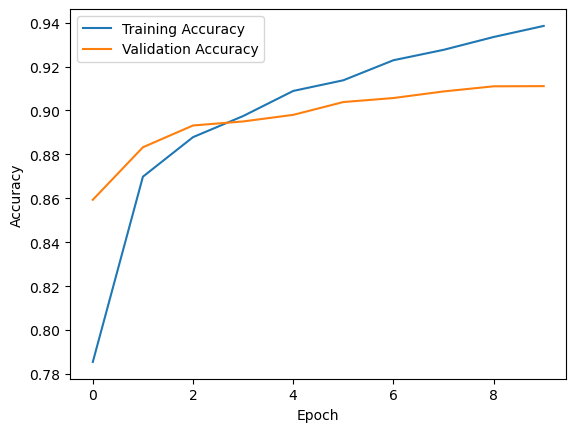

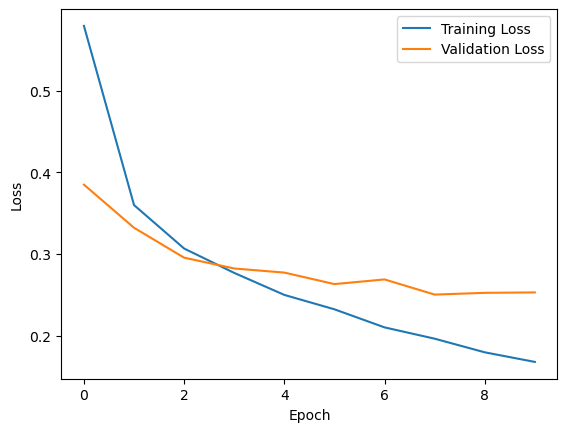

In [13]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



313/313 [==============================] - 7s 16ms/step


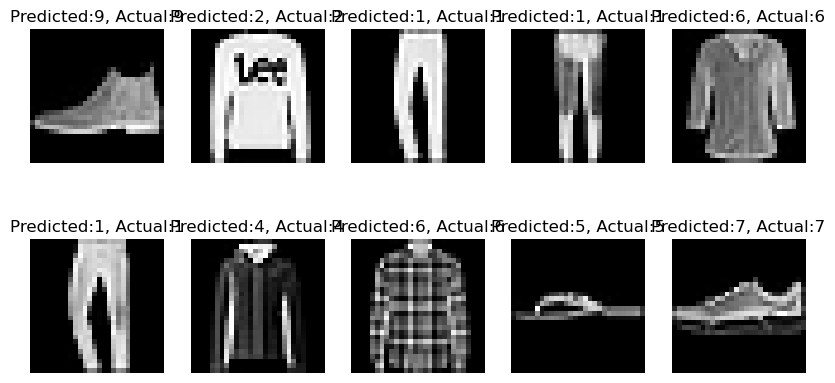

In [14]:
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)
actual_labels = tf.argmax(test_labels, axis=1)

sample_images=test_images[:10]
sample_predicted_labels=predicted_labels[:10]
sample_actual_labels=actual_labels[:10]

plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted:{sample_predicted_labels[i]}, Actual:{sample_actual_labels[i]}")
  plt.axis('off')

plt.show()